**Importation des bibliothèques**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

**Montage du Drive**

In [ ]:
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [ ]:
import os

In [ ]:
os.listdir('/drive/MyDrive')

**Importer les données**

In [ ]:
data = pd.read_csv('/drive/MyDrive/Data.csv')
data.head(10)
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Analyse des données**

In [ ]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

**Visualisation des différentes classes**

In [ ]:
fig = px.histogram(data['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=data['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**Classification binaire**

In [ ]:
def ratings(rating):
    if rating>3 and rating<=5:
        return 1
    if rating>0 and rating<=3:
        return 0

In [ ]:
ratings(4)

1

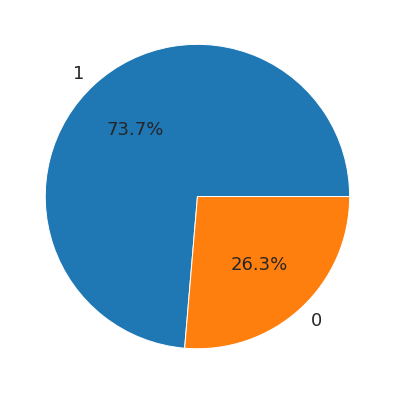

In [ ]:
data['Sentiment'] = data['Rating'].apply(ratings)
plt.pie(data['Sentiment'].value_counts(), labels=data['Sentiment'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [ ]:
char_count = len(data['Review'][0])
print(f'Length of a sample review: {char_count}')

Length of a sample review: 593


In [ ]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [ ]:
data['char_count'] = data['Review'].str.len()
data.head(10)

,Review,Rating,Sentiment,char_count
0,nice hotel expensive parking got good deal sta...,4,1,593
1,ok nothing special charge diamond member hilto...,2,0,1689
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427
3,"unique, great stay, wonderful time hotel monac...",5,1,600
4,"great stay great stay, went seahawk game aweso...",5,1,1281
5,love monaco staff husband stayed hotel crazy w...,5,1,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748
7,"excellent staff, housekeeping quality hotel ch...",4,1,597
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419
9,excellent stayed hotel monaco past w/e delight...,5,1,271


In [ ]:
word_count = data['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [ ]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [ ]:
data['Word_count'] = data['Review'].apply(word_count)
data.head(10)

,Review,Rating,Sentiment,char_count,Word_count
0,nice hotel expensive parking got good deal sta...,4,1,593,87
1,ok nothing special charge diamond member hilto...,2,0,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191
5,love monaco staff husband stayed hotel crazy w...,5,1,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748,101
7,"excellent staff, housekeeping quality hotel ch...",4,1,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419,59
9,excellent stayed hotel monaco past w/e delight...,5,1,271,35


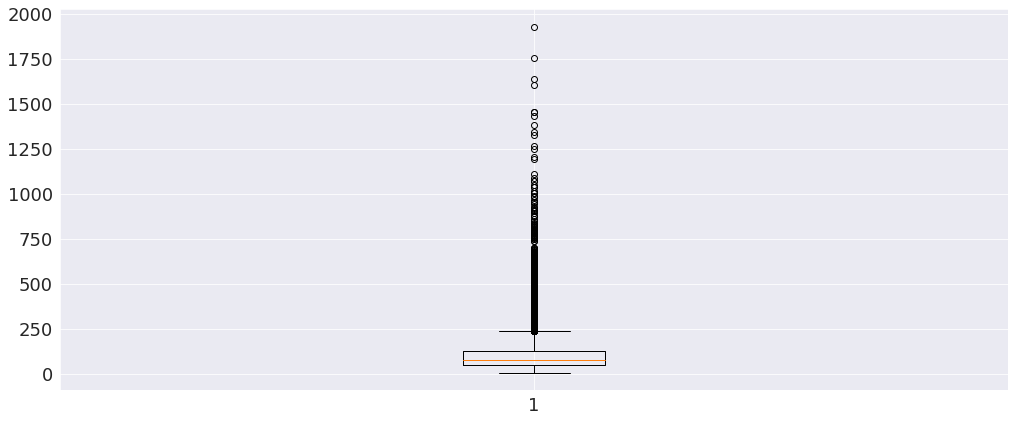

In [ ]:
plt.boxplot(data.Word_count)
plt.show()

Grande disparrité dans la longueur des critiques, on retrouve beaucoup d'outliers

In [ ]:
data['Average_Word_Length'] = data['char_count']/data['Word_count']
data.head(10)

,Review,Rating,Sentiment,char_count,Word_count,Average_Word_Length
0,nice hotel expensive parking got good deal sta...,4,1,593,87,6.816092
1,ok nothing special charge diamond member hilto...,2,0,1689,250,6.756000
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217,6.576037
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89,6.741573
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191,6.706806
5,love monaco staff husband stayed hotel crazy w...,5,1,1002,134,7.477612
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748,101,7.405941
7,"excellent staff, housekeeping quality hotel ch...",4,1,597,85,7.023529
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419,59,7.101695
9,excellent stayed hotel monaco past w/e delight...,5,1,271,35,7.742857


In [ ]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['Rating'])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(data[col], hue=data['Rating'])
    plt.legend(data['Rating'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

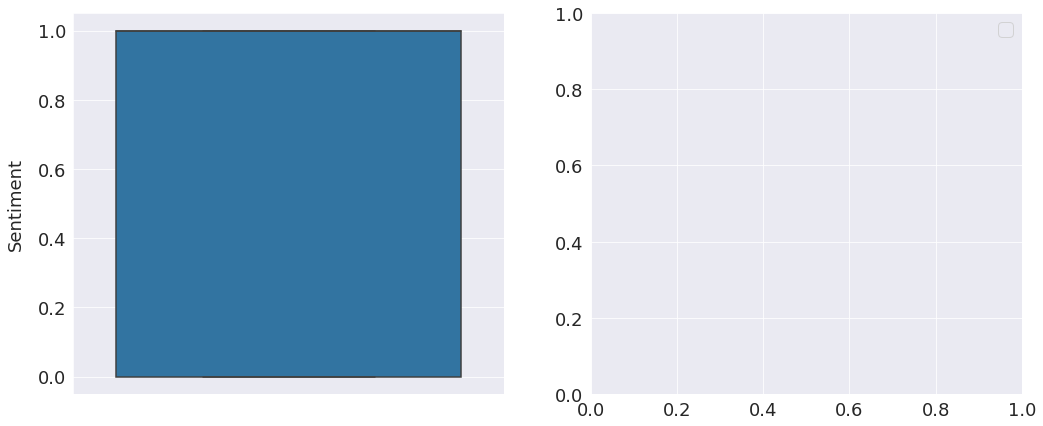

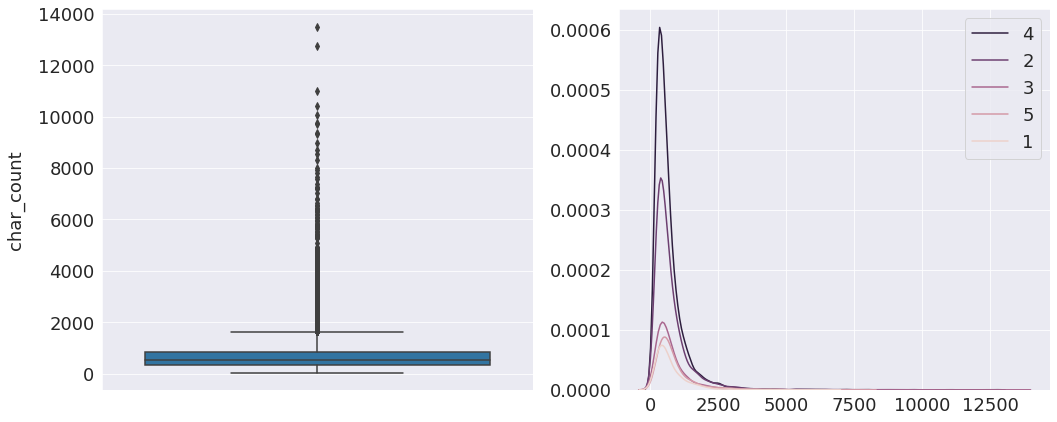

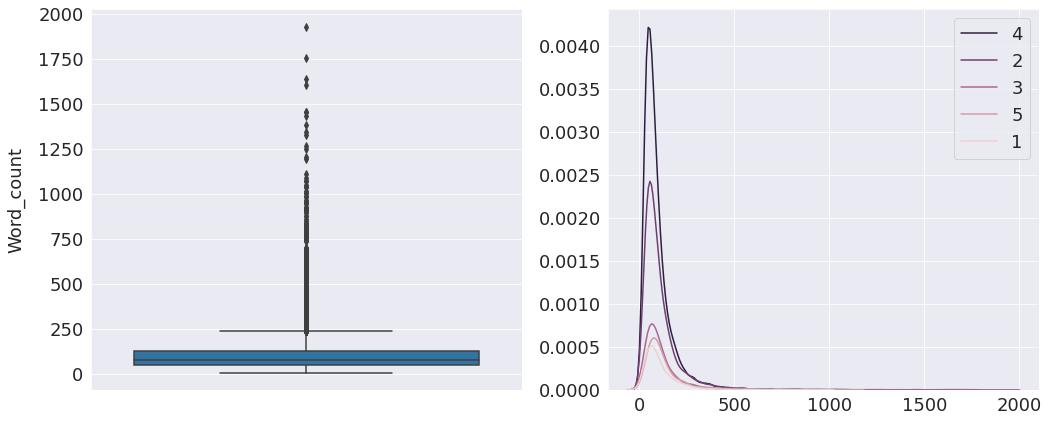

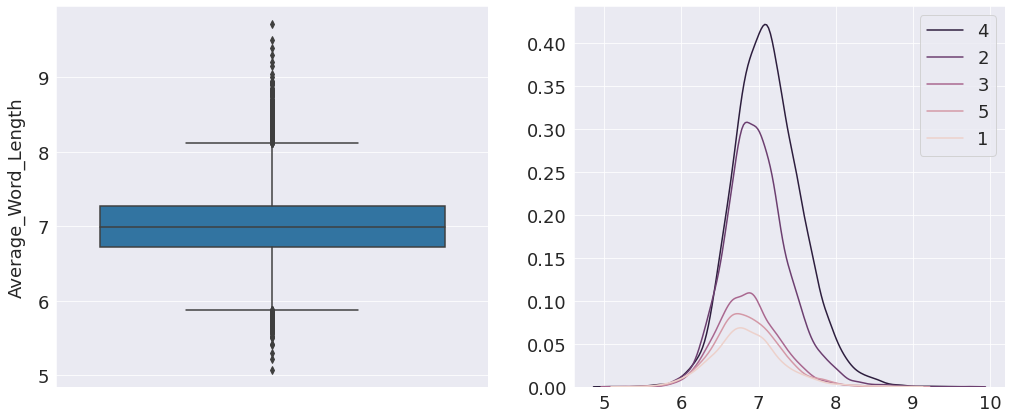

In [ ]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [ ]:
df = data.drop(features, axis=1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**Nettoyage**

In [ ]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data['Clean'] = data['Review'].apply(clean)

In [ ]:
data.head(10)

,Review,Rating,Sentiment,char_count,Word_count,Average_Word_Length,Clean
0,nice hotel expensive parking got good deal sta...,4,1,593,87,6.816092,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,0,1689,250,6.756000,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217,6.576037,nice rooms 4 experience hotel monaco seattle g...
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89,6.741573,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191,6.706806,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,1,1002,134,7.477612,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748,101,7.405941,cozy stay rainy city husband spent 7 nights mo...
7,"excellent staff, housekeeping quality hotel ch...",4,1,597,85,7.023529,excellent staff housekeeping quality hotel cho...
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419,59,7.101695,hotel stayed hotel monaco cruise rooms generou...
9,excellent stayed hotel monaco past w/e delight...,5,1,271,35,7.742857,excellent stayed hotel monaco past delight rec...


In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
data['Review_lists'] = data['Clean'].apply(corpus)
data.head(10)

,Review,Rating,Sentiment,char_count,Word_count,Average_Word_Length,Clean,Review_lists
0,nice hotel expensive parking got good deal sta...,4,1,593,87,6.816092,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,0,1689,250,6.756000,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217,6.576037,nice rooms 4 experience hotel monaco seattle g...,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89,6.741573,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191,6.706806,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,5,1,1002,134,7.477612,love monaco staff husband stayed hotel crazy w...,"[love, monaco, staff, husband, stayed, hotel, ..."
6,"cozy stay rainy city, husband spent 7 nights m...",5,1,748,101,7.405941,cozy stay rainy city husband spent 7 nights mo...,"[cozy, stay, rainy, city, husband, spent, 7, n..."
7,"excellent staff, housekeeping quality hotel ch...",4,1,597,85,7.023529,excellent staff housekeeping quality hotel cho...,"[excellent, staff, housekeeping, quality, hote..."
8,"hotel stayed hotel monaco cruise, rooms genero...",5,1,419,59,7.101695,hotel stayed hotel monaco cruise rooms generou...,"[hotel, stayed, hotel, monaco, cruise, rooms, ..."
9,excellent stayed hotel monaco past w/e delight...,5,1,271,35,7.742857,excellent stayed hotel monaco past delight rec...,"[excellent, stayed, hotel, monaco, past, delig..."


In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['Review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 116205.67it/s]


2060911

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('hotel', 48844),
 ('room', 34279),
 ('great', 21068),
 ('nt', 18989),
 ('good', 16953),
 ('staff', 16193),
 ('stay', 15142),
 ('nice', 12393),
 ('rooms', 12005),
 ('location', 11009)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

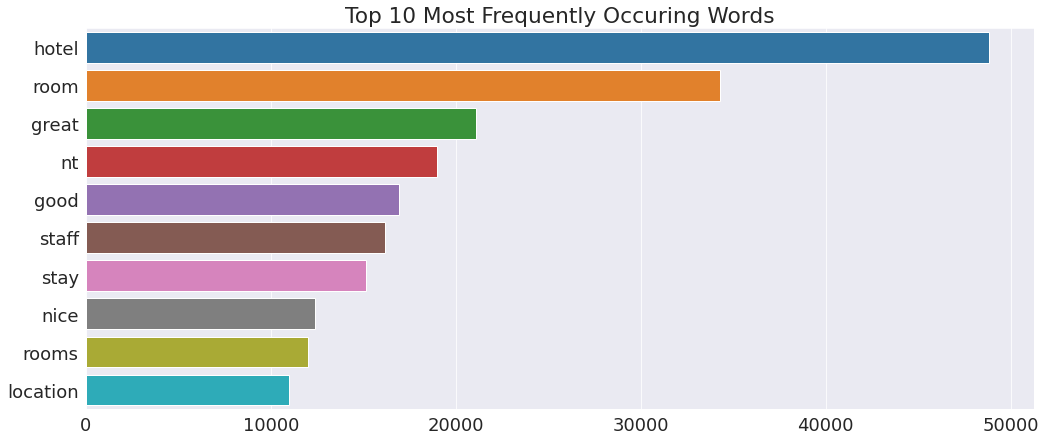

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

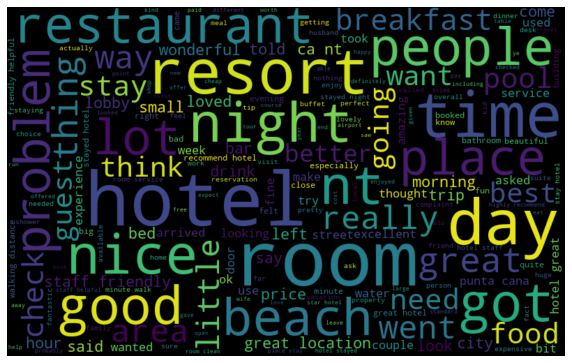

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(" ".join(data['Clean'].astype(str))
)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data

,Review,Rating,Sentiment,char_count,Word_count,Average_Word_Length,Clean,Review_lists
0,nice hotel expensive parking got good deal sta...,4,1,593,87,6.816092,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,0,1689,250,6.756000,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,0,1427,217,6.576037,nice rooms 4 experience hotel monaco seattle g...,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,1,600,89,6.741573,unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,1,1281,191,6.706806,great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,1,733,109,6.724771,best kept secret 3rd time staying charm 5-star...,"[best, kept, secret, 3rd, time, staying, charm..."
20487,great location price view hotel great quick pl...,4,1,306,39,7.846154,great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q..."
20488,"ok just looks nice modern outside, desk staff ...",2,0,443,63,7.031746,ok looks nice modern outside desk staff nt par...,"[ok, looks, nice, modern, outside, desk, staff..."
20489,hotel theft ruined vacation hotel opened sept ...,1,0,5557,781,7.115237,hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened..."


In [ ]:
data.to_pickle('/content/drive/MyDrive/data_prep.txt')